🔍 Scanning classification dataset for class distribution...

📊 Class counts (per split):

🧩 TRAIN:
  airplane       :   70
  bed            :   70
  bench          :   70
  bicycle        :   70
  bird           :   70
  bottle         :   70
  bowl           :   70
  bus            :   70
  cake           :   70
  car            :   70
  cat            :   70
  chair          :   70
  couch          :   70
  cow            :   70
  cup            :   70
  dog            :   70
  elephant       :   70
  horse          :   70
  motorcycle     :   70
  person         :   70
  pizza          :   70
  potted plant   :   70
  stop sign      :   70
  traffic light  :   70
  truck          :   70

🧩 VAL:
  airplane       :   15
  bed            :   15
  bench          :   15
  bicycle        :   15
  bird           :   15
  bottle         :   15
  bowl           :   15
  bus            :   15
  cake           :   15
  car            :   15
  cat            :   15
  chair          :   15
  cou

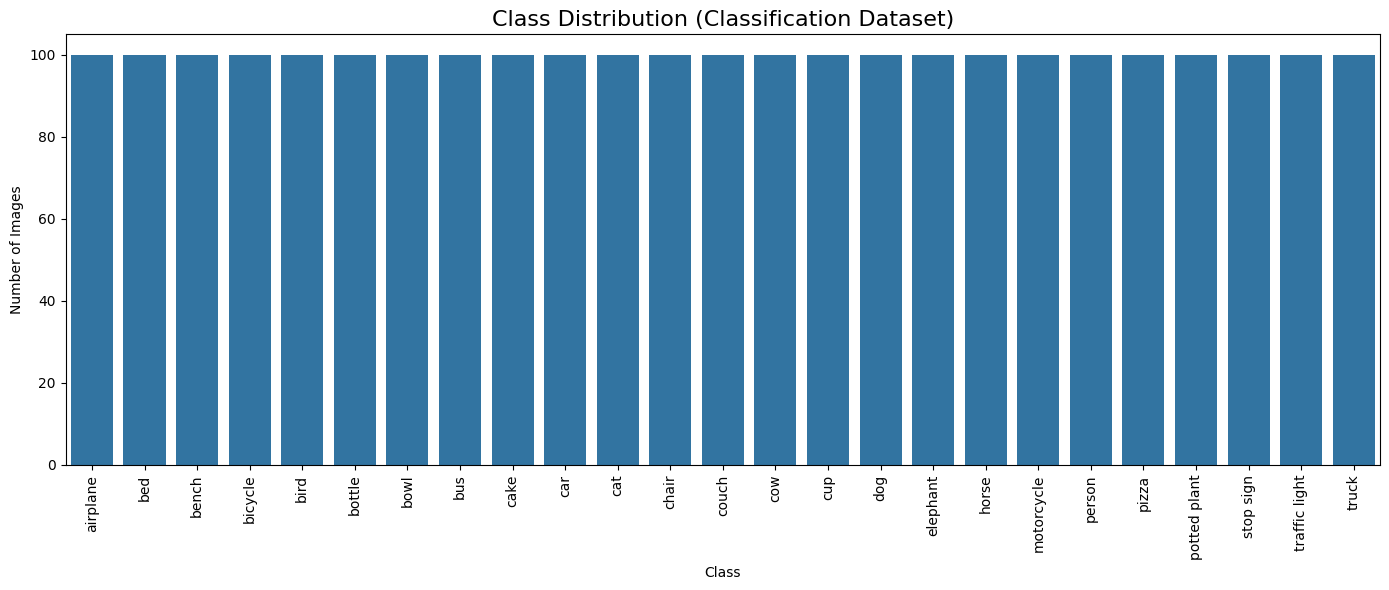

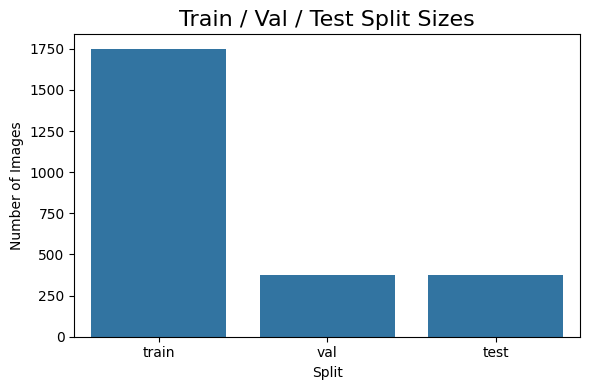


📊 Split totals:
  train: 1750 images
  val  : 375 images
  test : 375 images

🔍 Analyzing objects per image from YOLO labels...



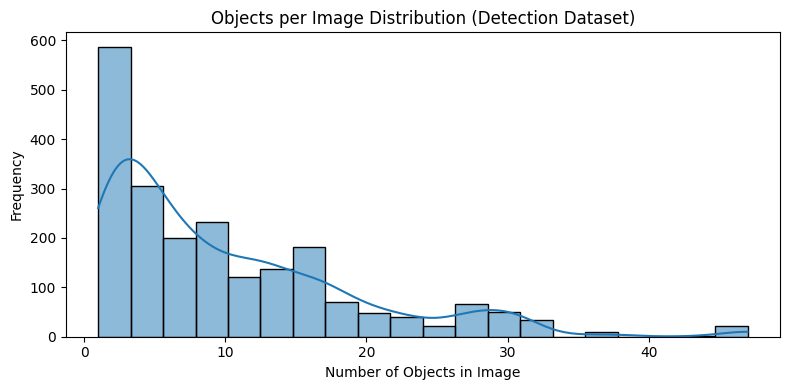

📈 Average objects per image: 10.15
📈 Max objects in a single image: 47

📊 Bounding box counts per class (from YOLO labels):
   0 - person         :   301 boxes
   1 - bicycle        :   276 boxes
   2 - car            :   265 boxes
   3 - motorcycle     :   862 boxes
   4 - airplane       :   374 boxes
   5 - bus            :   513 boxes
   6 - truck          :   400 boxes
   7 - traffic light  :   516 boxes
   8 - stop sign      :   435 boxes
   9 - bench          :  1532 boxes
  10 - bird           :  2147 boxes
  11 - cat            :   347 boxes
  12 - dog            :   484 boxes
  13 - horse          :  1265 boxes
  14 - cow            :   828 boxes
  15 - elephant       :  1242 boxes
  16 - bottle         :   653 boxes
  17 - cup            :   123 boxes
  18 - bowl           :   633 boxes
  19 - pizza          :   104 boxes
  20 - cake           :   877 boxes
  21 - chair          :   359 boxes
  22 - couch          :   566 boxes
  23 - bed            :   162 boxes
  24 - potte

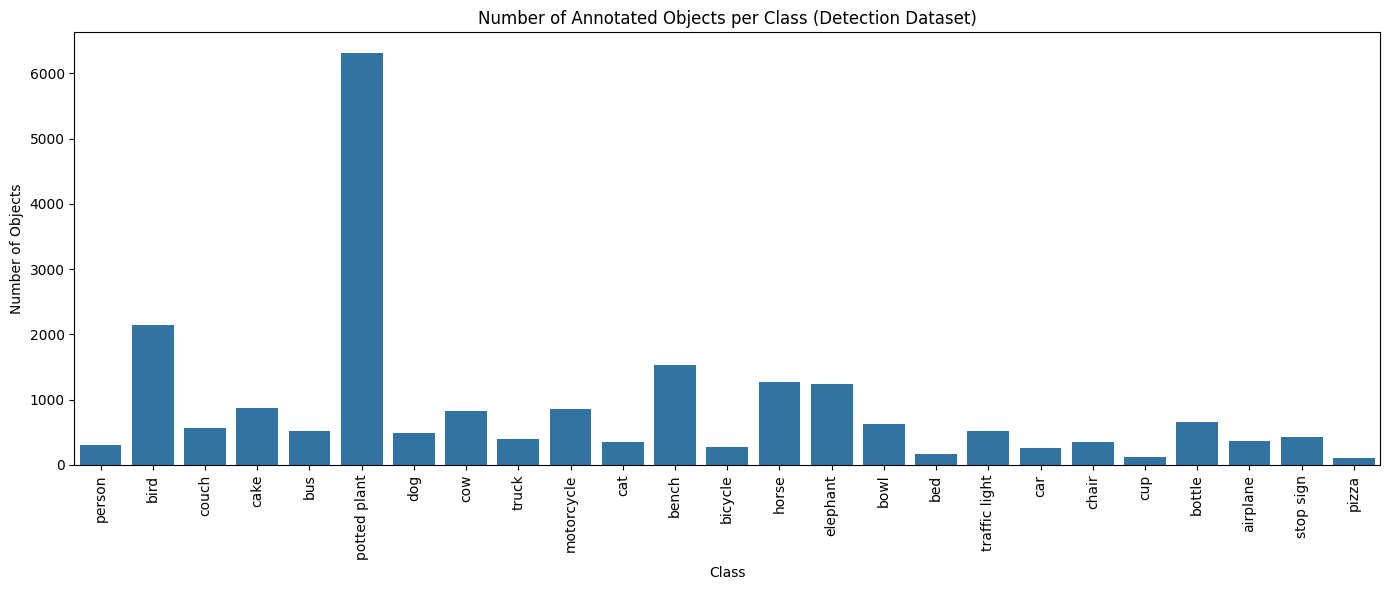


🔍 Analyzing image sizes from detection images...



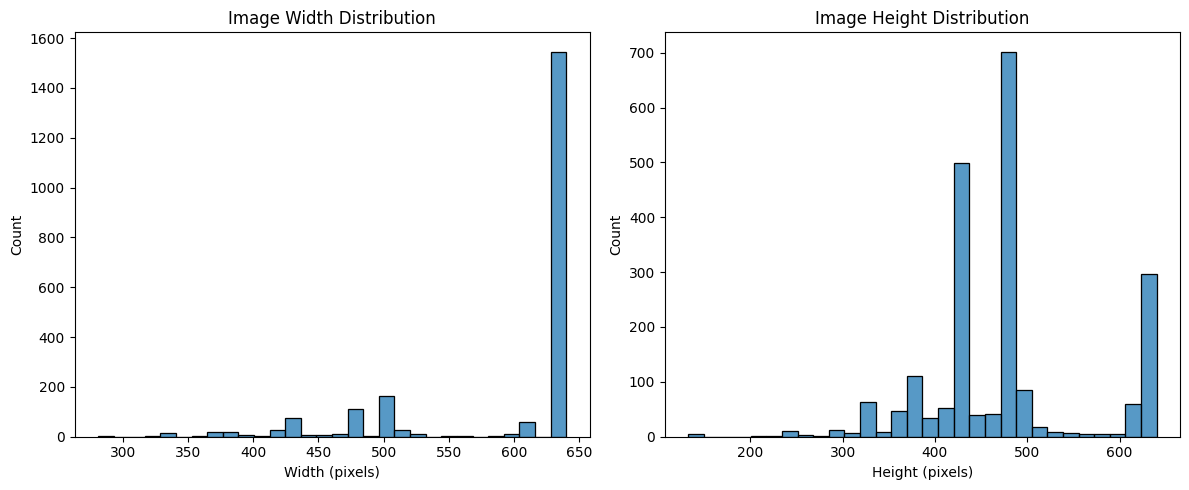

📐 Average size: 596.7 x 474.4 pixels
📐 Min size: 281 x 133
📐 Max size: 640 x 640

🖼 Showing 5 random annotated samples...



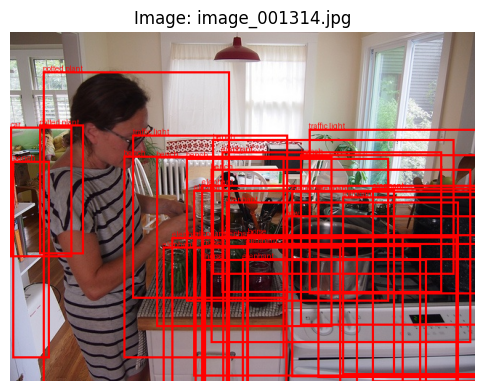

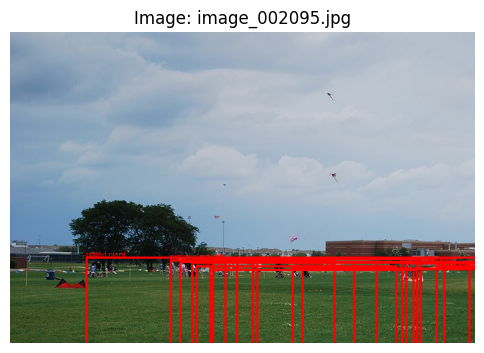

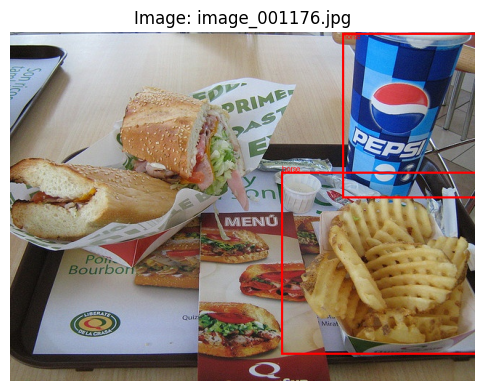

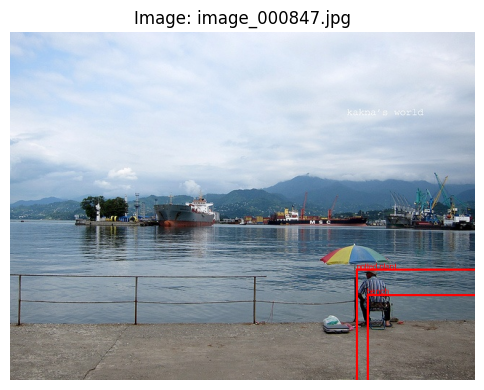

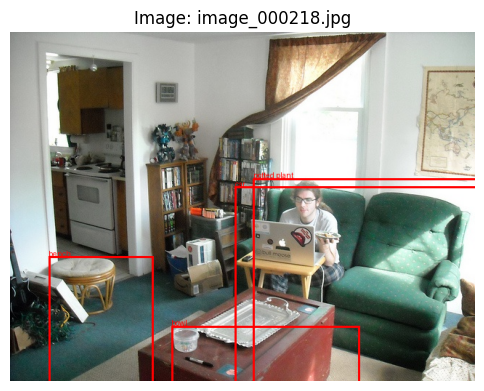


✅ EDA from disk completed.


In [1]:
# ============================================
# SMARTVISION AI - EDA FROM DISK
# ============================================

import os
import random
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw

# --------------------------------------------
# CONFIGURATION
# --------------------------------------------

BASE_DIR = "smartvision_dataset"   # change if needed

CLASSIFICATION_DIR = os.path.join(BASE_DIR, "classification")
DETECTION_IMG_DIR = os.path.join(BASE_DIR, "detection", "images")
DETECTION_LABEL_DIR = os.path.join(BASE_DIR, "detection", "labels")

# Order MUST match your data.yaml
YOLO_CLASS_NAMES = [
    "person",
    "bicycle",
    "car",
    "motorcycle",
    "airplane",
    "bus",
    "truck",
    "traffic light",
    "stop sign",
    "bench",
    "bird",
    "cat",
    "dog",
    "horse",
    "cow",
    "elephant",
    "bottle",
    "cup",
    "bowl",
    "pizza",
    "cake",
    "chair",
    "couch",
    "bed",
    "potted plant",
]

# --------------------------------------------
# 1. CLASS DISTRIBUTION (FROM CLASSIFICATION FOLDERS)
# --------------------------------------------

splits = ["train", "val", "test"]
class_counts_total = defaultdict(int)
class_counts_split = {s: defaultdict(int) for s in splits}

print("🔍 Scanning classification dataset for class distribution...\n")

for split in splits:
    split_dir = os.path.join(CLASSIFICATION_DIR, split)
    if not os.path.isdir(split_dir):
        print(f"⚠️ Missing split folder: {split_dir}")
        continue

    for class_name in sorted(os.listdir(split_dir)):
        class_dir = os.path.join(split_dir, class_name)
        if not os.path.isdir(class_dir):
            continue

        # Count image files
        num_images = sum(
            1 for f in os.listdir(class_dir)
            if f.lower().endswith((".jpg", ".jpeg", ".png"))
        )
        class_counts_split[split][class_name] += num_images
        class_counts_total[class_name] += num_images

print("📊 Class counts (per split):")
for split in splits:
    print(f"\n🧩 {split.upper()}:")
    for cls, cnt in sorted(class_counts_split[split].items()):
        print(f"  {cls:15s}: {cnt:4d}")

print("\n📊 Total images per class:")
for cls, cnt in sorted(class_counts_total.items()):
    print(f"  {cls:15s}: {cnt:4d}")

# Bar plot of total per class
plt.figure(figsize=(14, 6))
sns.barplot(
    x=list(class_counts_total.keys()),
    y=list(class_counts_total.values())
)
plt.xticks(rotation=90)
plt.title("Class Distribution (Classification Dataset)", fontsize=16)
plt.ylabel("Number of Images")
plt.xlabel("Class")
plt.tight_layout()
plt.show()

# --------------------------------------------
# 2. TRAIN/VAL/TEST SPLIT BALANCE
# --------------------------------------------

split_totals = {
    split: sum(class_counts_split[split].values()) for split in splits
}

plt.figure(figsize=(6, 4))
sns.barplot(
    x=list(split_totals.keys()),
    y=list(split_totals.values())
)
plt.title("Train / Val / Test Split Sizes", fontsize=16)
plt.ylabel("Number of Images")
plt.xlabel("Split")
plt.tight_layout()
plt.show()

print("\n📊 Split totals:")
for split, cnt in split_totals.items():
    print(f"  {split:5s}: {cnt} images")

# --------------------------------------------
# 3. OBJECTS PER IMAGE (FROM YOLO LABELS)
# --------------------------------------------

print("\n🔍 Analyzing objects per image from YOLO labels...\n")

objects_per_image = []
class_box_counts = defaultdict(int)

label_files = [
    f for f in os.listdir(DETECTION_LABEL_DIR)
    if f.lower().endswith(".txt")
]

for lbl in label_files:
    label_path = os.path.join(DETECTION_LABEL_DIR, lbl)
    with open(label_path, "r") as f:
        lines = [line.strip() for line in f.readlines() if line.strip()]

    objects_per_image.append(len(lines))

    for line in lines:
        parts = line.split()
        if len(parts) != 5:
            continue  # skip malformed
        class_id = int(parts[0])
        if 0 <= class_id < len(YOLO_CLASS_NAMES):
            class_box_counts[class_id] += 1

# Histogram of objects per image
plt.figure(figsize=(8, 4))
sns.histplot(objects_per_image, bins=20, kde=True)
plt.title("Objects per Image Distribution (Detection Dataset)")
plt.xlabel("Number of Objects in Image")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

print(f"📈 Average objects per image: {np.mean(objects_per_image):.2f}")
print(f"📈 Max objects in a single image: {np.max(objects_per_image)}")

# Per-class box counts
print("\n📊 Bounding box counts per class (from YOLO labels):")
for class_id, count in sorted(class_box_counts.items()):
    name = YOLO_CLASS_NAMES[class_id]
    print(f"  {class_id:2d} - {name:15s}: {count:5d} boxes")

plt.figure(figsize=(14, 6))
sns.barplot(
    x=[YOLO_CLASS_NAMES[cid] for cid in class_box_counts.keys()],
    y=list(class_box_counts.values())
)
plt.xticks(rotation=90)
plt.title("Number of Annotated Objects per Class (Detection Dataset)")
plt.ylabel("Number of Objects")
plt.xlabel("Class")
plt.tight_layout()
plt.show()

# --------------------------------------------
# 4. IMAGE SIZE DISTRIBUTION (FROM DETECTION IMAGES)
# --------------------------------------------

print("\n🔍 Analyzing image sizes from detection images...\n")

widths, heights = [], []

image_files = [
    f for f in os.listdir(DETECTION_IMG_DIR)
    if f.lower().endswith((".jpg", ".jpeg", ".png"))
]

for img_name in image_files:
    img_path = os.path.join(DETECTION_IMG_DIR, img_name)
    try:
        with Image.open(img_path) as img:
            w, h = img.size
            widths.append(w)
            heights.append(h)
    except Exception as e:
        print(f"⚠️ Error reading {img_path}: {e}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(widths, bins=30)
plt.title("Image Width Distribution")
plt.xlabel("Width (pixels)")

plt.subplot(1, 2, 2)
sns.histplot(heights, bins=30)
plt.title("Image Height Distribution")
plt.xlabel("Height (pixels)")

plt.tight_layout()
plt.show()

print(f"📐 Average size: {np.mean(widths):.1f} x {np.mean(heights):.1f} pixels")
print(f"📐 Min size: {np.min(widths)} x {np.min(heights)}")
print(f"📐 Max size: {np.max(widths)} x {np.max(heights)}")

# --------------------------------------------
# 5. VISUALIZE SAMPLE IMAGES WITH YOLO ANNOTATIONS
# --------------------------------------------

def visualize_random_annotated_images(num_samples=5):
    """Show random detection images with bounding boxes drawn from YOLO labels."""
    print(f"\n🖼 Showing {num_samples} random annotated samples...\n")

    # Filter only images that have a label file
    valid_label_files = [
        f for f in label_files
        if os.path.exists(os.path.join(DETECTION_IMG_DIR, f.replace(".txt", ".jpg")))
        or os.path.exists(os.path.join(DETECTION_IMG_DIR, f.replace(".txt", ".jpeg")))
        or os.path.exists(os.path.join(DETECTION_IMG_DIR, f.replace(".txt", ".png")))
    ]

    if not valid_label_files:
        print("⚠️ No matching image-label pairs found.")
        return

    samples = random.sample(valid_label_files, min(num_samples, len(valid_label_files)))

    for lbl in samples:
        label_path = os.path.join(DETECTION_LABEL_DIR, lbl)

        # Try possible image extensions
        base = os.path.splitext(lbl)[0]
        img_path = None
        for ext in [".jpg", ".jpeg", ".png"]:
            candidate = os.path.join(DETECTION_IMG_DIR, base + ext)
            if os.path.exists(candidate):
                img_path = candidate
                break

        if img_path is None:
            print(f"⚠️ No image found for label file {lbl}")
            continue

        # Load image
        img = Image.open(img_path).convert("RGB")
        w_img, h_img = img.size
        draw = ImageDraw.Draw(img)

        # Read YOLO annotations
        with open(label_path, "r") as f:
            lines = [line.strip() for line in f.readlines() if line.strip()]

        for line in lines:
            parts = line.split()
            if len(parts) != 5:
                continue

            class_id = int(parts[0])
            x_c, y_c, w_norm, h_norm = map(float, parts[1:])

            # Convert YOLO normalized coords -> pixel box
            box_w = w_norm * w_img
            box_h = h_norm * h_img
            x_center = x_c * w_img
            y_center = y_c * h_img

            x1 = x_center - box_w / 2
            y1 = y_center - box_h / 2
            x2 = x_center + box_w / 2
            y2 = y_center + box_h / 2

            # Draw rectangle + label
            class_name = YOLO_CLASS_NAMES[class_id] if 0 <= class_id < len(YOLO_CLASS_NAMES) else str(class_id)
            draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
            draw.text((x1, max(0, y1 - 10)), class_name, fill="red")

        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.title(f"Image: {os.path.basename(img_path)}")
        plt.axis("off")
        plt.show()

# Call the visualization function
visualize_random_annotated_images(num_samples=5)

print("\n✅ EDA from disk completed.")


In [2]:
# Count collected images
counts = {cls: len(class_images[cls]) for cls in SELECTED_CLASSES.keys()}

plt.figure(figsize=(14,6))
sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")
plt.xticks(rotation=90)

plt.title("Class Distribution in the Dataset (Before Splits)", fontsize=16)
plt.ylabel("Number of Images")
plt.xlabel("Classes")
plt.show()


NameError: name 'SELECTED_CLASSES' is not defined